In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('fictional_character_battles_complex.csv')
df.head(5)

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0


In [42]:
df.columns


Index(['Character', 'Universe', 'Strength', 'Speed', 'Intelligence',
       'SpecialAbilities', 'Weaknesses', 'BattleOutcome'],
      dtype='object')

In [43]:
df.isnull().sum()

Character           0
Universe            0
Strength            0
Speed               0
Intelligence        0
SpecialAbilities    0
Weaknesses          0
BattleOutcome       0
dtype: int64

In [44]:
df['Strength'].unique()

array([ 7,  4,  8,  5, 10,  3,  6,  2,  1,  9], dtype=int64)

In [45]:
df['Speed'].unique()

array([ 8,  7,  6,  9,  2,  5,  4,  3,  1, 10], dtype=int64)

In [46]:
df['Intelligence'].unique()

array([ 3,  9,  5, 10,  2,  7,  4,  1,  6,  8], dtype=int64)

In [47]:
df['BattleOutcome'].unique()

array([0, 1], dtype=int64)

In [48]:
df.nunique()

Character            8
Universe             2
Strength            10
Speed               10
Intelligence        10
SpecialAbilities     4
Weaknesses           4
BattleOutcome        2
dtype: int64

### Visualizing dataset by the help of graphs to analyse the impact of certain features on BattleOutcome.

c:\Users\akr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\akr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\akr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\akr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\akr\AppData\Local\Programs\Python\P

Text(0.5, 1.0, 'Character & Strength')

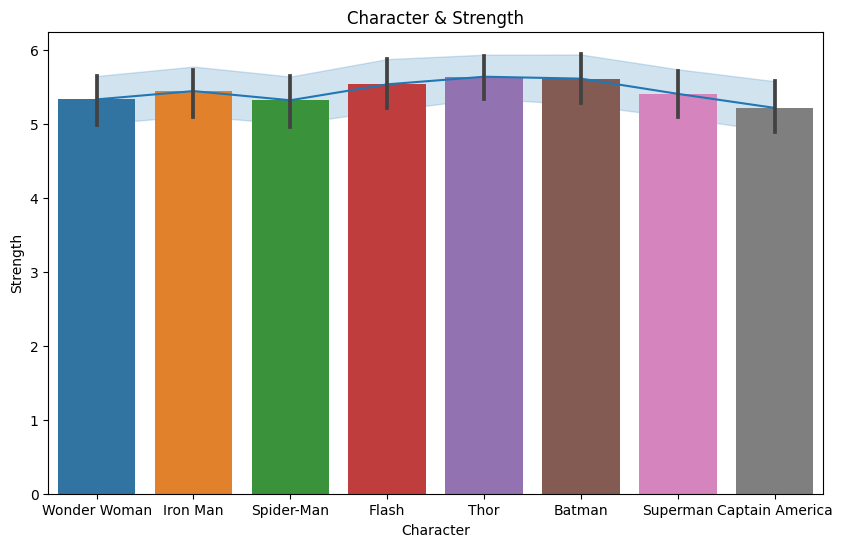

In [49]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Character', y = 'Strength', data= df)
sns.barplot(x='Character', y = 'Strength', data= df)
plt.title('Character & Strength')

In [50]:
import plotly.express as px

columns = df.columns.to_list()
['Character',
 'Universe',
 'Strength',
 'Speed',
 'Intelligence',
 'SpecialAbilities',
 'Weaknesses',
 'BattleOutcome']

for column in columns:
    fig = px.histogram(data_frame=df, x=column)
    fig.show()

### Character Prediction by Strength, Speed and Intelligence

In [51]:
X = df[['Strength','Speed','Intelligence']]

In [52]:
Y = df['Character']

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.12101910828025478

In [55]:
def predict_char1(Strength, Speed, Intelligence):
    
    x = np.zeros(len(X.columns))
    x[0] = Strength
    x[1] = Speed
    x[2] = Intelligence

    return model.predict([x])[0]

In [56]:
predict_char1(9,6,10)

c:\Users\akr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



'Flash'

In [57]:
def predict_char2(Strength, Speed, Intelligence):
    
    x = np.zeros(len(X.columns))
    x[0] = Strength
    x[1] = Speed
    x[2] = Intelligence

    return model.predict([x])[0]

In [58]:
predict_char2(9,10,10)

c:\Users\akr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



'Spider-Man'

## Predicting Winner among battle by their Strength Value:

In [77]:
player_1 = input('what is the strength of player 1')
player_2 = input('what is the strength of player 2')

In [78]:
if player_1 > player_2:
   large_str = player_1
else:
  large_str = player_2

In [79]:
def predict_winner_char(large_str, Speed, Intelligence):
    
    x = np.zeros(len(X.columns))
    x[0] = large_str
    x[1] = Speed
    x[2] = Intelligence

    return model.predict([x])[0]

In [80]:
predict_winner_char(large_str,8,4)

c:\Users\akr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



'Spider-Man'